##Bibliotecas

In [ ]:
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

#Carrendo o conjunto de dados Frutas

In [ ]:
data = pd.read_csv('fruit_test.csv', delimiter=';')

print(data.head())
X = data[['mass', 'width', 'height', 'color_score']]
y = data['fruit_name']

print(X.head())

print(y.head())

   mass  width  height  color_score fruit_name
0   176    7.4     7.2         0.60      apple
1    76    5.8     4.0         0.81   mandarin
2   166    6.9     7.3         0.93      apple
3   168    7.5     7.6         0.73      apple
4   170    7.6     7.9         0.88      apple
   mass  width  height  color_score
0   176    7.4     7.2         0.60
1    76    5.8     4.0         0.81
2   166    6.9     7.3         0.93
3   168    7.5     7.6         0.73
4   170    7.6     7.9         0.88
0       apple
1    mandarin
2       apple
3       apple
4       apple
Name: fruit_name, dtype: object


#Pré-Processamento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Concepção do Modelo

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Avaliação do Modelo

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score: {f1:.2f}')

F1-Score: 0.56


###R:
#####O F1-Score de 0,56 indica que, em média, o modelo não está capturando bem a relação entre precisão e revocação. Embora o valor sugira um desempenho razoável, ele também indica que o modelo não é confiável.

#Validação Cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=kf)

print(f'Acurácia média com K-Fold: {cross_val_scores.mean():.2f}')

Acurácia média com K-Fold: 0.20


##R:

#####Uma acurácia média de 0.20 significa que o modelo está acertando apenas 20% das previsões, o que é inferior ao que seria esperado em um cenário aleatório para um problema de classificação binária.

#Apresentação da Árvore Gerada

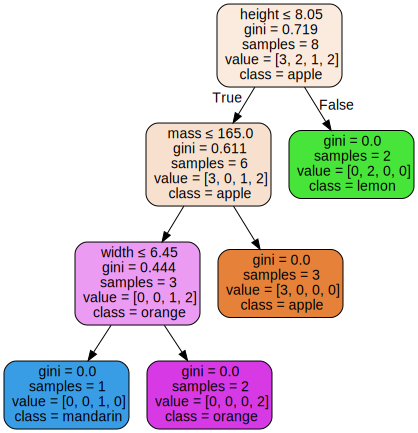

In [ ]:
dot_data = export_graphviz(model, out_file=None,
                           feature_names=['mass', 'width', 'height', 'color_score'],
                           class_names=model.classes_,
                           filled=True, rounded=True, special_characters=True)


graph = graphviz.Source(dot_data)
graph